In [2]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

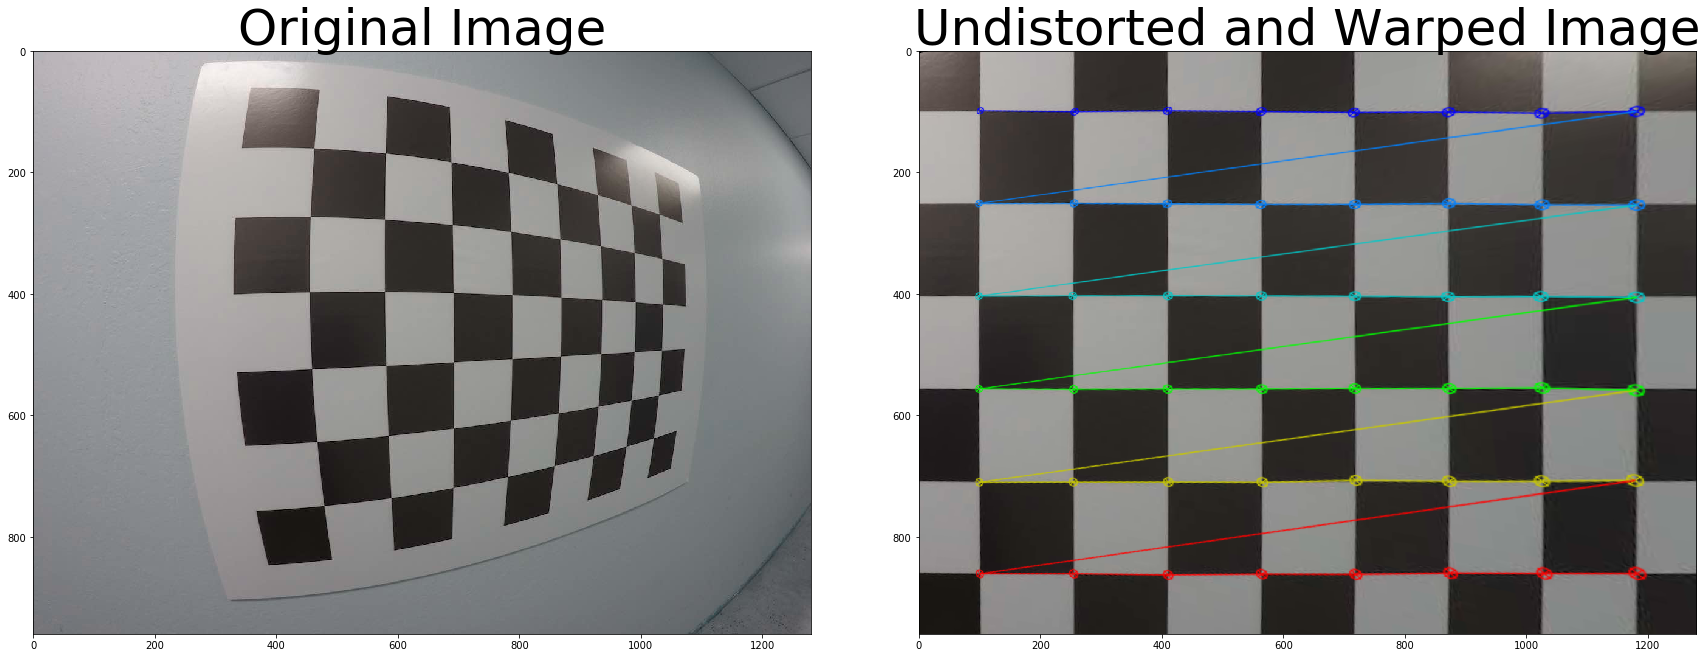

In [4]:
img = cv2.imread('test_image2.png')
nx = 8 
ny = 6 
def corners_unwarp(img, nx, ny, mtx, dist):
    
    corrected_image=cv2.undistort(img,mtx,dist,None,mtx)
   
    gray_image=cv2.cvtColor(corrected_image, cv2.COLOR_BGR2GRAY)
   
    ret,corners=cv2.findChessboardCorners(gray_image,(nx,ny),None)
    
    if ret==True:
            
            cv2.drawChessboardCorners(corrected_image,(nx,ny), corners, ret)
            
            
            src=np.float32([corners[0],corners[nx-1],corners[-1],corners[-nx]])
            
            offset=100
            dst=np.float32([[offset,offset],[gray_image.shape[1]-offset,offset],[gray_image.shape[1]-offset,gray_image.shape[0]-offset],[offset,gray_image.shape[0]-offset]])
           
            M=cv2.getPerspectiveTransform(src,dst)
           
            img_size=(corrected_image.shape[1],corrected_image.shape[0])
            warped = cv2.warpPerspective(corrected_image, M, img_size)
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

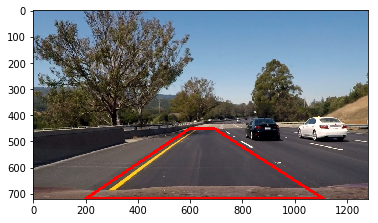

In [32]:
img=mpimg.imread("test6.jpg")

copy = np.copy(img)
bottom_px = copy.shape[0] - 1
pts = np.array([[200,bottom_px],[600,450],[690,450], [1110, bottom_px]], np.int32)
cv2.polylines(copy,[pts],True,(255,0,0), 10)
plt.imshow(copy)
src_pts=np.float32(pts)
dest_pts=np.array([[200,bottom_px],[200,0],[1000,0],[1000,bottom_px]],np.float32)

In [33]:

def perspective_transform(src_pts,dest_pts):
    matrix=cv2.getPerspectiveTransform(src_pts,dest_pts)
    inverse_matrix=cv2.getPerspectiveTransform(dest_pts,src_pts)
    warped_image = cv2.warpPerspective(img, matrix,(img.shape[1],img.shape[0]))
    return warped_image


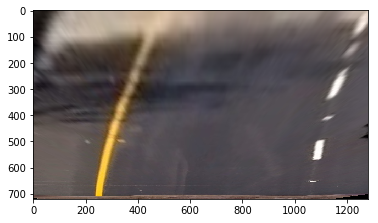

In [34]:
out=perspective_transform(src_pts,dest_pts)
plt.imshow(out)